# PyBore - Processing and Visualizing Borehole Data

This notebook illustrates the main functionality of `pybore`, a Python libary similar to the [welly](https://code.agilescientific.com/welly/) package, for processing and visualizing borehole data. 


## Importing Libraries

In [1]:
import sys
sys.path.insert(0,'../pybore/')

from borehole import Borehole
from boreholeml import BoreholeML

import pandas as pd

C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Creating a new borehole

A new borehole can be created using the `Borehole` class and by providing the `name`, the `address`, the `location`, the coordinate reference system `crs` and the `altitude_above_sea_level`. 

In [2]:
borehole = Borehole(name='Weisweiler R1',
                    address= '52249 Eschweiler',
                    location = [310791.655,5634993.126],
                    crs='EPSG:25832',
                    altitude_above_sea_level=136)
borehole

### Inspecting the different attributes

The following illustrates the different attributes that are implemented in the `Borehole` class. 

In [3]:
borehole.name

'Weisweiler R1'

In [4]:
borehole.address

'52249 Eschweiler'

In [5]:
borehole.location.wkt

'POINT (310791.655 5634993.126)'

The borehole location is stored as Shapely Point.

In [6]:
type(borehole.location)

shapely.geometry.point.Point

In [7]:
borehole.x

310791.655

In [8]:
borehole.y

5634993.126

### Inspecting the Data in a Pandas DataFrame

All provided meta data can also be visualized in a Pandas DataFrame. 

In [9]:
borehole.df

,Value
Name,Weisweiler R1
Address,52249 Eschweiler
Location,POINT (310791.655 5634993.126)
X,310791.655
Y,5634993.126
Coordinate Reference System,EPSG:25832
Coordinate Reference System PyProj,EPSG:25832
Altitude above sea level,136
Altitude above KB,None


## Loading a deviation file for desurveying a borehole

Boreholes are never completely straight and may even be drilled in a deviated way on purpose. Measuring the depth (MD), the inclination (incl) and the azimuth (azi) in intervals allows us to desurvey the borehole and getting the true `northing`, `easting`, and `tvd` (true vertical depth). 

This is done using the `wellpathpy` package and the implemented minimal curvature method. 

<img src="../images/Minimum-Curvature-Method.jpg" width=400>
Image Source: https://www.drillingformulas.com/minimum-curvature-method/

In [10]:
df = pd.read_csv('../data/borehole_deviation.csv', 
                 delimiter=';')
df.head()

,md,incl,azi
0,4.11,0.0,0.0
1,14.11,0.3,70.4
2,24.11,0.1,211.6
3,34.11,0.0,346.4
4,44.11,0.2,1.2


### Adding the deviation file

A deviation file can be added to the `Borehole` class using the `add_deviation` method. The parameter `step` defines the increment between each desurveyed point. 

In [11]:
borehole.add_deviation('../data/borehole_deviation.csv', 
                       delimiter=';', 
                       step=50)

### Inspecting the Deviation DataFrame

The deviation DataFrame can be inspected using the `deviation_df` attribute. It has the same contents as the deviation CSV file.

In [12]:
borehole.deviation.deviation_df

,Measured Depth,Inclination,Azimuth
0,4.1100,0.0000,0.0000
1,14.1100,0.3000,70.4000
2,24.1100,0.1000,211.6000
3,34.1100,0.0000,346.4000
4,44.1100,0.2000,1.2000
...,...,...,...
4583,2520.1429,8.9879,249.1292
4584,2520.6429,8.9000,249.2429
4585,2521.1429,8.9000,249.2311
4586,2521.6429,8.9000,249.2311


### Inspecting the Desurveyed DataFrame with relative values

The desurveyed DataFrame can be inspected using the `desurveyed_df` attribute. It contains the `northing`, `easting`, and `tvd` measurements of the borehole from the origin. 

In [13]:
borehole.deviation.desurveyed_df.head(10)

,True Vertical Depth,Northing_rel,Easting_rel
0,45.889864,0.037467,0.039740
1,95.889174,0.202999,-0.023607
2,145.870726,1.095213,-0.914570
3,195.725448,4.009180,-3.128798
4,245.330721,8.099560,-5.176272
5,294.721972,13.829376,-10.431096
6,344.181087,18.935008,-15.678069
7,393.725719,23.524916,-20.603141
8,443.284605,27.869409,-25.605076
9,492.859541,32.033995,-30.600438


### Adding absolute values to the desurveyed DataFrame

Most of the time, the absolute coordinates are needed. Therefore, you can easily add the coordinates of the origin using `add_origin_to_desurveying` which ultimately adds the coordinates to the existing columns and saves them in three new columns. 

In [14]:
borehole.deviation.add_origin_to_desurveying(x=borehole.x,
                                             y=borehole.y,
                                             z=borehole.altitude_above_sea_level)

In [15]:
borehole.deviation.desurveyed_df.head(10)

,True Vertical Depth,Northing_rel,Easting_rel,Northing,Easting,True Vertical Depth Below Sea Level
0,45.889864,0.037467,0.039740,5.634993e+06,310791.694740,90.110136
1,95.889174,0.202999,-0.023607,5.634993e+06,310791.631393,40.110826
2,145.870726,1.095213,-0.914570,5.634994e+06,310790.740430,-9.870726
3,195.725448,4.009180,-3.128798,5.634997e+06,310788.526202,-59.725448
4,245.330721,8.099560,-5.176272,5.635001e+06,310786.478728,-109.330721
5,294.721972,13.829376,-10.431096,5.635007e+06,310781.223904,-158.721972
6,344.181087,18.935008,-15.678069,5.635012e+06,310775.976931,-208.181087
7,393.725719,23.524916,-20.603141,5.635017e+06,310771.051859,-257.725719
8,443.284605,27.869409,-25.605076,5.635021e+06,310766.049924,-307.284605
9,492.859541,32.033995,-30.600438,5.635025e+06,310761.054562,-356.859541


### Displaying the deviation in a 2D polar plot

The deviation can also be visualized in a 2D polar plot illustrating a map view of the deviation of the borehole.

**NB: A 3D polar plot is currently not available in Python.**

(<Figure size 640x480 with 1 Axes>, <PolarAxes: >)

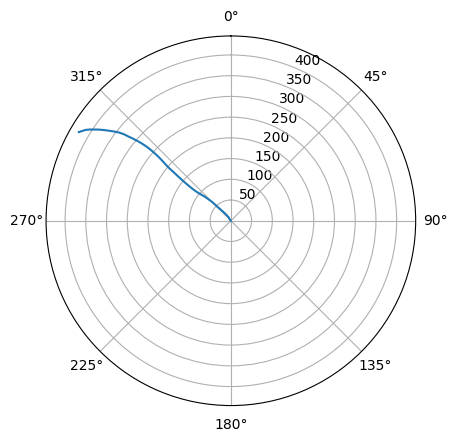

In [16]:
borehole.deviation.plot_deviation_polar_plot()

### Displaying the deviation in a 3D plot

The deviation can also be visualized using a 3D plot. 

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='Easting', ylabel='Northing', zlabel='TVD'>)

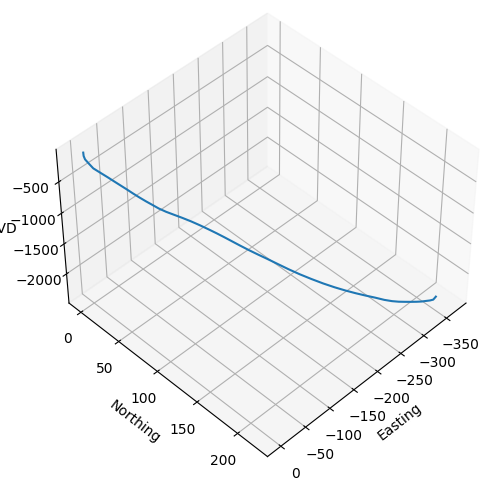

In [17]:
borehole.deviation.plot_deviation_3d()

### Plotting the Borehole using PyVista

C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


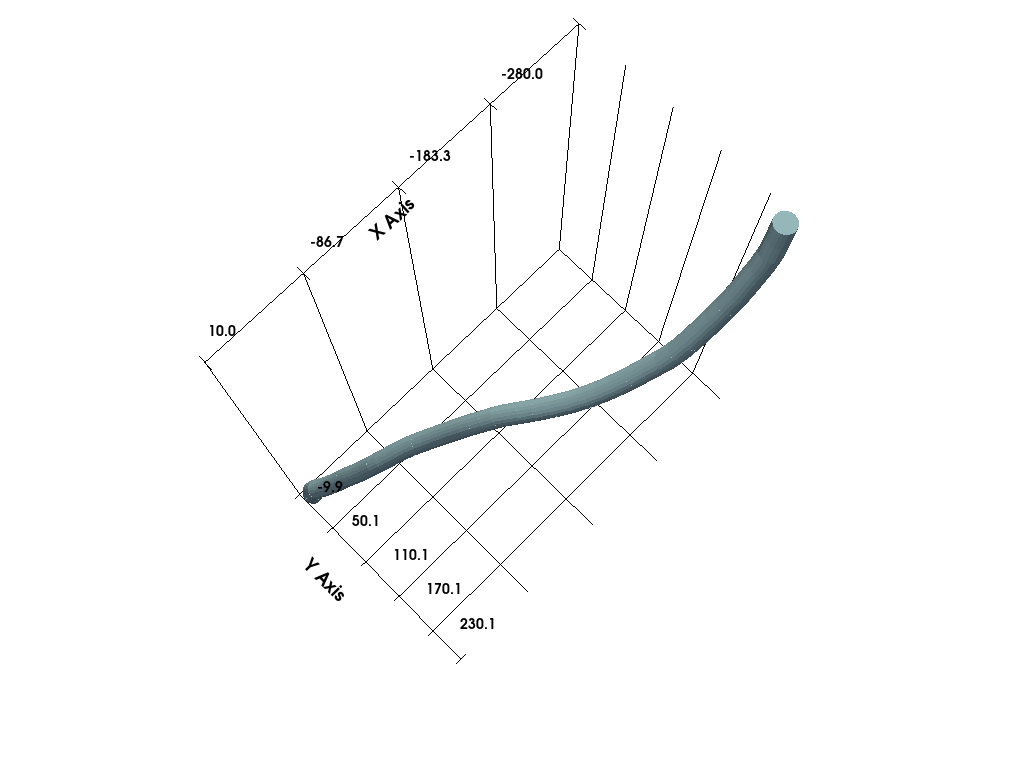

In [18]:
tube = borehole.deviation.get_borehole_tube()

import pyvista as pv
p = pv.Plotter(notebook=True)

p.add_mesh(tube)
p.set_scale(1,1,0.2)
p.show_grid(font_size=12)
p.show()

### Inspecting the Deviation attributes

The respectice deviation attributes can be inspected or used for further computations.

In [19]:
borehole.deviation.md

array([   4.11  ,   14.11  ,   24.11  , ..., 2521.1429, 2521.6429,
       2522.1429])

In [20]:
borehole.deviation.inc

array([0. , 0.3, 0.1, ..., 8.9, 8.9, 8.9])

In [21]:
borehole.deviation.azi

array([  0.    ,  70.4   , 211.6   , ..., 249.2311, 249.2311, 249.244 ])

In [22]:
borehole.deviation.easting_rel[:10]

array([ 3.97403606e-02, -2.36071656e-02, -9.14569603e-01, -3.12879815e+00,
       -5.17627183e+00, -1.04310956e+01, -1.56780690e+01, -2.06031406e+01,
       -2.56050761e+01, -3.06004382e+01])

In [23]:
borehole.deviation.northing_rel[:10]

array([ 0.03746682,  0.20299904,  1.09521296,  4.00918031,  8.09956032,
       13.82937614, 18.93500752, 23.52491559, 27.86940906, 32.03399464])

In [24]:
borehole.deviation.tvd[:10]

array([ 45.88986417,  95.88917386, 145.87072592, 195.72544791,
       245.33072146, 294.72197197, 344.1810866 , 393.72571873,
       443.28460469, 492.85954146])

## Loading Well Logs 

Similar to `welly`, `pybore` allows the user to load well logs and displaying them. Here, the `lasio` library is utilized.

In [25]:
borehole.add_well_logs('../data/borehole.las')

### Inspecting the Logs

The logs can be inspected using a Pandas DataFrame.

In [26]:
borehole.logs.df

,SGRRAW,SGR,SGRRAW_COR,SGR_COR,232TH,238U,40K,GRRAW,GR,GRRAW_COR,GR_COR
MD,,,,,,,,,,,
0.343,18.0403,16.7586,30.4280,28.2661,1.68240,0.120665,0.140486,NaN,NaN,NaN,NaN
0.394,16.8469,16.1176,28.4151,27.1850,1.56995,0.149466,0.144757,NaN,NaN,NaN,NaN
0.445,16.1627,15.4009,27.2608,25.9760,1.46829,0.189842,0.146184,NaN,NaN,NaN,NaN
0.496,12.5322,14.7974,21.1367,24.9582,1.40126,0.237724,0.143370,NaN,NaN,NaN,NaN
0.547,11.6311,14.4867,19.6178,24.4343,1.38538,0.306336,0.136263,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
88.726,57.9948,52.4976,75.3090,68.1704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88.777,54.8308,47.1021,71.2004,61.1639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88.828,36.1207,40.9637,46.9008,53.1927,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Inspecting the different curves

The `curves` attribute provides information about the different measured logs.

In [27]:
borehole.logs.curves

,original_mnemonic,mnemonic,descr,unit
0,MD,MD,,
1,SGRRAW,SGRRAW,SGRRaw,API
2,SGR,SGR,SGR,API
3,SGRRAW_COR,SGRRAW_COR,SGRRAW_COR,API
4,SGR_COR,SGR_COR,SGR_COR,API
5,232TH,232TH,232TH,PPM
6,238U,238U,238U,PPM
7,40K,40K,40K,%
8,GRRAW,GRRAW,GRRaw,API
9,GR,GR,GR,API


### Inspecting the Well Header

The `header` and `params` attributes provides information about the well. 

In [28]:
borehole.logs.well_header

,mnemonic,unit,value,descr
0,STRT,M,0.343,FIRST INDEX VALUE
1,STOP,M,88.93,LAST INDEX VALUE
2,STEP,M,0.051,STEP
3,NULL,,-999.25,NULL VALUE
4,COMP,,,COMPANY
5,WELL,,,WELL
6,FLD,,,FIELD
7,LOC,,,LOCATION
8,SRVC,,,
9,CTRY,,Germany,COUNTRY


In [29]:
borehole.logs.params

,mnemonic,unit,value,descr
0,001_BOHRUNGSNUMMER,,314532,001_Bohrungsnummer
1,002_FIRMA,,Geologischer Dienst NRW_Fachbereich 34_Geophys...,002_Firma
2,003_GR,,,003_GR
3,004_GR_FEL,,yes,004_GR_FEL
4,005_GR_SAL_TEMP,,,005_GR_SAL_TEMP
...,...,...,...,...
172,326_GERÄTEDATEN#9,,,326_Gerätedaten#9
173,327_RUN#10,,,327_Run#10
174,328_TRIP#10,,,328_Trip#10
175,329_GERÄTEDATEN#10,,,329_Gerätedaten#10


### Plotting the well logs
The well logs can be plotted by providing the names of the respective log to `plot_well_logs`.

(<Figure size 400x800 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

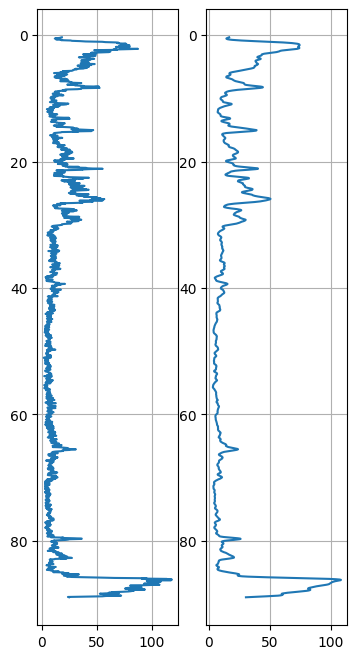

In [30]:
borehole.logs.plot_well_logs(tracks=['SGRRAW', 'SGR'])

## Plotting Well Logs along PyVista borehole

In [ ]:
mesh = borehole.logs.get_mesh_along_borehole_path(log='SGR')

# Parsing BoreholeML XML File

In [32]:
boreholeml = BoreholeML('../data/borehole.xml')

In [33]:
boreholeml.meta_data

0
Bounded_by     Envelope srsName                                       EPSG:5555
                        srsDimension                                          3
                        X_Lower_Corner                               490255.678
                        Y_Lower_Corner                              5693752.477
                        Z_Lower_Corner                                    266.0
...                                                                         ...
Feature_Member Borehole Origin         srsDimension                           2
                                       Original_Location  2699075.53 5699467.42
                                       Location_Method                        F
                                       Elevation                            410
                                       Level_Method                           F

[78 rows x 1 columns]

In [34]:
boreholeml.stratigraphic_table

,Top,Base,Rock_Code,Rock_Name_Text,Rock_Name,Percentage,Rock_Color,Chronostratigraphy,Lithostratigraphy,Rock_Code_Sublayer,Rock_Name_Text_Sublayer,Rock_Name_Sublayer,Rock_Color_Sublayer,Top_Sublayer,Base_Sublayer
0,0.0,4.6,FSZ,Feinsandstein,fSst,40,h2,T1I,:,TZ,Tonstein,Tst,h2,0,4.6
1,4.6,13.0,FSZ; UZ; K; 3,Feinsandstein; Schluffstein; kalkig; mit ...,fSst,40,c1&h4,T1I,:,TZ,Tonstein,Tst,c1,4.6,13
2,13.0,15.0,UZ; FSZ; K; 3,Schluffstein; Feinsandstein; kalkig; mit ...,Ust,40,h3,T1I,:,TZ,Tonstein,Tst,h2,4.6,13
3,15.0,18.0,UZ; FSZ,Schluffstein; Feinsandstein,lK,40,h7&h3,T1I,:,TZ,Tonstein,Tst,h2,15,18
4,18.0,20.0,FSZ; MSZ; K; 3,Feinsandstein; Mittelsandstein; kalkig; mit ...,Ust,40,h2,T1I,:,CA,Calcit (Kalkspat),Kst,h2,20,24
5,20.0,24.0,FSZ; MSZ; K; 3,Feinsandstein; Mittelsandstein; kalkig; mit ...,fSst,40,h2,T1I,:,UZ; TZ,Schluffstein; Tonstein,Ust,c1&h8,20,24
6,24.0,25.0,FSZ,Feinsandstein,lK,40,h3,T1I,:,TKI; SZ; QZ; 3,Kieselschiefer; Sandstein; Quarzit; mit ...,Tst,h8&h3,25,30.4
7,25.0,30.4,MSZ; GSZ; K; 3,Mittelsandstein; Grobsandstein; kalkig; mit ...,Ust,40,h2,"P3, P3C, P3W",:,DZ,Dolomitstein,Qzt,c1&h8,40,43.6
8,30.4,31.0,KZ; DZ,Kalkstein; Dolomitstein,fSst,40,h3,"P3, P3C, P3W",:,UZ,Schluffstein,Sst,c2,46,46
9,31.0,37.0,KZ,Kalkstein,fSst,40,h2,"P3, P3C, P3W",:,KZ,Kalkstein,Qzt,h8,52,53


In [35]:
boreholeml.drilling_process

,From,To,Drilling_Method,Drilling_Tool,Drillhole_Diameter
1,0,80,DL,None,None
0,80,144,SP,None,None


In [36]:
boreholeml.installation_details

,Casing_String_Number,Casing_String_Type,From,To,Casing_Installation_Element,Casing_Diameter,Casing_Material,Casing_Wall_Thickness
0,1,un,0,53,RO,5,None,None
2,3,un,138,140,RO,5,None,None
1,2,un,53,138,FI,5,None,None


In [37]:
boreholeml.investigations

,From,To,Investigation_Type
0,0.01,144,GC
1,0.01,144,GC
